# Static Data Load

In [15]:
import pandas as pd
import numpy as np
import os

def load_data_excel(file_path):
    """
    Load data from an Excel file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_excel(file_path)
    return df

In [16]:
df_ICE_HEV_original = load_data_excel("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_ICE&HEV.xlsx")
df_PHEV_EV_original = load_data_excel("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_PHEV&EV.xlsx")

df_ICE_HEV = df_ICE_HEV_original.copy()
df_PHEV_EV = df_PHEV_EV_original.copy()

In [17]:
df_ICE_HEV.info()
df_PHEV_EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                                357 non-null    int64 
 1   Vehicle Type                         357 non-null    object
 2   Vehicle Class                        357 non-null    object
 3   Engine Configuration & Displacement  357 non-null    object
 4   Transmission                         354 non-null    object
 5   Drive Wheels                         357 non-null    object
 6   Generalized_Weight                   357 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                  

In [18]:
for i in df_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_ICE_HEV[i].unique())

Unique values in column 'VehId':
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 433 434 435
 436 437 438 439 4

In [19]:
for i in df_PHEV_EV.columns:
    print(f"Unique values in column '{i}':")
    print(df_PHEV_EV[i].unique())

Unique values in column 'VehId':
[  9  10  11 371 379 388 398 417 431 443 449 453 455 457 492 497 536 537
 541 542 545 550 554 560 561 567 569]
Unique values in column 'EngineType':
['PHEV' 'EV']
Unique values in column 'Vehicle Class':
['Car']
Unique values in column 'Engine Configuration & Displacement':
['4-GAS/ELECTRIC 1.4L' 'ELECTRIC' '4-GAS/ELECTRIC 2.0L'
 '4-GAS/ELECTRIC 1.8L' '4-GAS/ELECTRIC 1.5L']
Unique values in column 'Transmission':
['NO DATA' 'CVT']
Unique values in column 'Drive Wheels':
['FWD']
Unique values in column 'Generalized_Weight':
[4000 3500 3000]


In [20]:
# if 'NO DATA' type values are present, replace them with NaN
df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)
df_PHEV_EV.replace('NO DATA', np.nan, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12428\3721211436.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)


In [21]:
# change datatypes and rename columns as needed
df_ICE_HEV['Drive Wheels'] = df_ICE_HEV['Drive Wheels'].astype('object')
df_PHEV_EV.rename(columns={'EngineType': 'Vehicle Type'}, inplace=True)


In [22]:
df_static = pd.concat([df_ICE_HEV, df_PHEV_EV], ignore_index=True)

In [23]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   VehId                                384 non-null    int64  
 1   Vehicle Type                         384 non-null    object 
 2   Vehicle Class                        32 non-null     object 
 3   Engine Configuration & Displacement  384 non-null    object 
 4   Transmission                         95 non-null     object 
 5   Drive Wheels                         27 non-null     object 
 6   Generalized_Weight                   368 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 21.1+ KB


In [24]:
for i in df_static.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_static[i].nunique()}")
    print(df_static[i].unique())
    print(df_static[i].value_counts())


Unique values in column 'VehId':
Number of unique values: 384
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 

In [25]:
df_static.describe(include='all')

,VehId,Vehicle Type,Vehicle Class,Engine Configuration & Displacement,Transmission,Drive Wheels,Generalized_Weight
count,384.000000,384,32,384,95,27,368.000000
unique,NaN,4,2,74,17,1,NaN
top,NaN,ICE,Car,4-FI 2.4L,CVT,FWD,NaN
freq,NaN,264,31,48,27,27,NaN
mean,360.867188,NaN,NaN,NaN,NaN,NaN,3483.695652
std,153.293829,NaN,NaN,NaN,NaN,NaN,697.215509
min,2.000000,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,236.500000,NaN,NaN,NaN,NaN,NaN,3000.000000
50%,369.500000,NaN,NaN,NaN,NaN,NaN,3500.000000
75%,485.250000,NaN,NaN,NaN,NaN,NaN,4000.000000


In [26]:
# check for duplicates
duplicates = df_static.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_static[duplicates])

# Dynamic Data Load

In [27]:
def load_csv_files_from_directory(directory):
    """
    Load all CSV files from a specified directory and return a concatenated DataFrame.
    """
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = []
    
    for file in all_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)

In [28]:
df_part1_original = load_csv_files_from_directory("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part1")
#df_part2_original = load_csv_files_from_directory("G:\\DIY Guru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part2")

df_part1 = df_part1_original.copy()
#df_part2 = df_part2_original.copy()


In [ ]:
df_part1.info()
#df_part2.info()

In [ ]:
for i in df_part1.columns:
    print(f"Unique values in column '{i}':")
    print(df_part1[i].unique())

In [ ]:
for i in df_part2.columns:
    print(f"Unique values in column '{i}':")
    print(df_part2[i].unique())

In [ ]:
df_dynamic = pd.concat([df_part1, df_part2], ignore_index=True)

In [ ]:
df_dynamic.info()

In [ ]:
for i in df_dynamic.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_dynamic[i].nunique()}")
    print(df_dynamic[i].unique())
    print(df_dynamic[i].value_counts())

In [ ]:
df_dynamic.describe(include='all')

In [ ]:
df_dynamic.head()

In [29]:
# check for duplicates
duplicates = df_dynamic.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_dynamic[duplicates])
    

NameError: name 'df_dynamic' is not defined

In [ ]:
df_static.columns

In [ ]:
df_dynamic.columns

# Join Static and Dynamic dataframes

In [ ]:
print(df_dynamic['VehId'].nunique(), len(df_dynamic))
print(df_static['VehId'].nunique(), len(df_static))

In [30]:
df_dynamic_sample = df_part1.sample(frac=0.50, random_state=42)

In [31]:
len(df_dynamic_sample)

5118478

In [32]:
df = df_dynamic_sample.merge(df_static, on='VehId', how='left')

In [ ]:
#22436808
df.info()

In [33]:
# check for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates])

In [34]:
for i in df.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df[i].nunique()}")
    print(df[i].unique())
    print(df[i].value_counts())


Unique values in column 'DayNum':
Number of unique values: 15383
[130.55213663 109.90206494  46.50061109 ...  30.59042635   7.60616594
  76.84865423]
DayNum
47.605510     5395
42.708322     4880
100.445583    3220
1.477313      3179
23.953190     2932
              ... 
35.892528       42
141.737495      42
37.589300       41
36.048668       40
114.777630      39
Name: count, Length: 15383, dtype: int64

Unique values in column 'VehId':
Number of unique values: 368
[487 392 285 566 242 560 494 240 369 542 565 428 156 212 455 394 452 443
 308 465 176 418 237 371 278 577  10 545 301 271 192 289 460 531 562 557
 181 230 370 208 184 323 272 356 298 459 536 160 283 477 484 534 139 533
 120 232 569 411 470 195   2 250 180   8 258 540 591 454 319 488 409 415
 309 564 457 349 374 516 595 135 282 233 185 378 368 223 437 274 140 213
 483 618 269 228 561 353 372 388 333 163 203 522 299 205 592 430 439 490
 435 276 530 196 286 447 155 476 266 147 475 347 410 444 215 575 218 351
 546 468 307 450 6

In [ ]:
df.head().to_dict()

In [35]:
df['OAT[DegC]'].sort_values().unique()

array([-40.  , -39.  , -38.  , -37.  , -36.  , -24.5 , -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.  ,
       -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25, -17.  , -16.75,
       -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25, -15.  , -14.75,
       -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25, -13.  , -12.75,
       -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25, -11.  , -10.75,
       -10.5 , -10.25, -10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,
        -8.5 ,  -8.25,  -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,
        -6.5 ,  -6.25,  -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,
        -4.5 ,  -4.25,  -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,
        -2.5 ,  -2.25,  -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,
        -0.5 ,  -0.25,   0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,
         1.5 ,   1.75,   2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,
         3.5 ,   3.75,   4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,
      

In [36]:
# < -20, -20 to 0, 0 to 10, 10 to 20, 20 to 30, > 30, map these values to OAT[DegC] values and create a new column 'OAT_Category'

def categorize_oat(value):
    if value < -20:
        return 'Extremely Cold'
    elif -20 <= value < 0:
        return 'Cold'
    elif 0 <= value < 10:
        return 'Cool'
    elif 10 <= value < 20:
        return 'Mild'
    elif 20 <= value < 30:
        return 'Warm'
    elif value >= 30:
        return 'Hot'
    else:
        return np.nan

df['OAT_Category'] = df['OAT[DegC]'].apply(categorize_oat)


In [37]:
df['OAT_Category'].unique()

array([nan, 'Cool', 'Cold', 'Mild', 'Warm', 'Extremely Cold', 'Hot'],
      dtype=object)

In [ ]:
df.info()

In [ ]:
df = df.sort_values(by=['DayNum', 'VehId','Trip']).reset_index(drop=True)
df.head()

In [38]:
import pandas as pd
from datetime import datetime, timedelta

# Reference datetime for DayNum = 1
reference_date = datetime(2017, 11, 1)

# Convert DayNum to timestamp using vectorized timedelta
df['DateTime'] = pd.to_timedelta(df['DayNum'] - 1, unit='D') + reference_date

# Create separate columns for date and time
df['Date'] = df['DateTime'].dt.date

# Create a time column with proper formatting
df['Time'] = df['DateTime'].dt.time

In [39]:
# calculate distance travelled in km using Vehicle Speed[km/h] and Timestamp(ms)
df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)

In [55]:
df_distance = df.groupby(['Vehicle Type'])['Distance[km]'].mean().reset_index().sort_values(by='Distance[km]', ascending=False)
df_distance


,Vehicle Type,Distance[km]
3,PHEV,5.789103
1,HEV,4.873559
0,EV,4.478784
2,ICE,4.421037


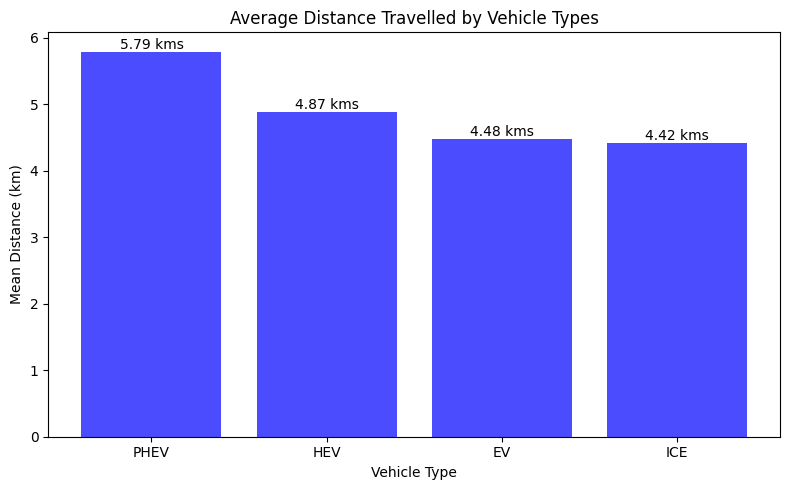

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(df_distance['Vehicle Type'], df_distance['Distance[km]'], alpha=0.7, color= 'blue')
plt.title('Average Distance Travelled by Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Distance (km)')
# Add text labels on top of the bars
for index, value in enumerate(df_distance['Distance[km]']):
    plt.text(index, value , f"{value:.2f} kms", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [40]:
df.columns
# Save the final DataFrame to a CSV file

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight', 'OAT_Category', 'DateTime', 'Date', 'Time',
       'Distance[km]'],
      dtype='object')

In [ ]:


plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue', alpha=0.7)
plt.title('Distance Travelled by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Distance (km)')
plt.tight_layout()
plt.show()